<a href="https://colab.research.google.com/github/basleal22/kaim-week-1/blob/task-3/notebooks/corelation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/basleal22/kaim-week-1
%cd kaim-week-1
!git switch task-3

Cloning into 'kaim-week-1'...
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 439 (delta 128), reused 190 (delta 69), pack-reused 179 (from 1)
Receiving objects: 100% (439/439), 5.27 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/kaim-week-1/kaim-week-1/kaim-week-1
Branch 'task-3' set up to track remote branch 'task-3' from 'origin'.
Switched to a new branch 'task-3'


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import yfinance as yf
import pandas as pd
import os
from scripts.utils import CorrelationAnalyzer


os.chdir('/content/kaim-week-1')
datafile = "/content/drive/MyDrive/data_raw_analyst/raw_analyst_ratings.csv"  # Replace with the actual path to your CSV data file
datafile_1=pd.read_csv(datafile)
print(datafile_1.head())

#analyzer = CorrelationAnalyzer()  # You can pass None for ticker, start_date, and end_date

# Call the sentiment_stock_analysis method to get the correlation and the combined data
#correlation, combined_data = analyzer.sentiment_stock_analysis(datafile)
#print(combined_data.head())
#print(datafile.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [27]:
datafile_1['date'] = pd.to_datetime(datafile_1['date'], errors='coerce')
datafile_1['date'] = datafile_1['date'].dt.tz_localize(None)
print(datafile_1['date'].head())

0   2020-06-05 10:30:54
1   2020-06-03 10:45:20
2   2020-05-26 04:30:07
3   2020-05-22 12:45:06
4   2020-05-22 11:38:59
Name: date, dtype: datetime64[ns]


In [29]:
analyzer = CorrelationAnalyzer()
print(type(datafile))
datafile_1['sentiment'] = datafile_1['headline'].apply(analyzer.get_sentiment)




<class 'str'>


In [30]:
print("Preprocessed Data:", datafile_1[['headline','sentiment','stock']].head(30))

Preprocessed Data:                                              headline  sentiment stock
0             Stocks That Hit 52-Week Highs On Friday   0.000000     A
1          Stocks That Hit 52-Week Highs On Wednesday   0.000000     A
2                       71 Biggest Movers From Friday   0.000000     A
3        46 Stocks Moving In Friday's Mid-Day Session   0.000000     A
4   B of A Securities Maintains Neutral on Agilent...   0.000000     A
5   CFRA Maintains Hold on Agilent Technologies, L...   0.000000     A
6   UBS Maintains Neutral on Agilent Technologies,...   0.000000     A
7   Agilent Technologies shares are trading higher...   0.250000     A
8   Wells Fargo Maintains Overweight on Agilent Te...   0.000000     A
9          10 Biggest Price Target Changes For Friday   0.000000     A
10    30 Stocks Moving in Friday's Pre-Market Session   0.000000     A
11  SVB Leerink Maintains Outperform on Agilent Te...   0.000000     A
12  8 Stocks Moving In Thursday's After-Hours Session   0.

In [41]:
datafile_1 = datafile_1.dropna(subset=['headline', 'date', 'stock'])
preprocessed_data = analyzer.sentiment_correlation(datafile)
print(datafile_1['date'].head())

TypeError: string indices must be integers

In [38]:
print("Preprocessed Data:")
print(preprocessed_data.head())
datafile_1 = datafile_1.dropna(subset=['headline', 'date', 'stock'])
datafile_1 = datafile_1.dropna(subset=['date'])
print(datafile_1.isna().sum())

Preprocessed Data:
Empty DataFrame
Columns: [headline, date, stock]
Index: []
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
sentiment     0
dtype: int64


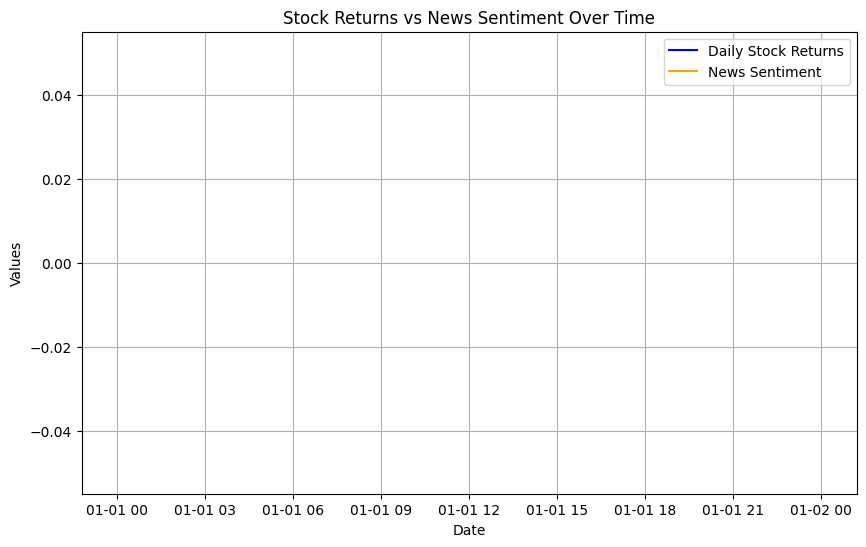

In [ ]:
plot_return_sent = analyzer.plot_sentiment_correlation(combined_data)
plot_return_sent

In [ ]:
# Optionally, you can print or work with the results here
print(f"Correlation between news sentiment and stock returns: {correlation:.2f}")
print(correlation)

Correlation between news sentiment and stock returns: nan
nan
